In [10]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
from micrograd import Value, Neuron, MLP, Layer

In [12]:
np.random.seed(1337)
random.seed(1337) #fixing the data that random function generates

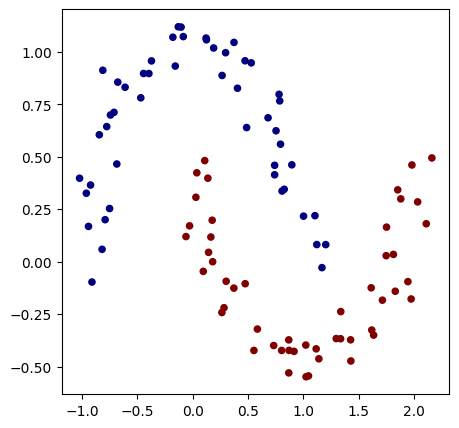

In [13]:
from sklearn.datasets import make_moons, make_blobs
X,y = make_moons(n_samples=100, noise=0.1)

y = y*2 -1
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')

In [20]:
model = MLP(2, [16,16,1])
print(model)
print("no of params", len(model.parameters())) 

no of params 337


In [21]:
def loss(X,y,batch_size= None):
    # input, batchwise or total
    if batch_size is None:
        Xb, yb = X, y
    else:
        ri = np.random.permutation(X.shape[0])[:batch_size]
        Xb, yb= X[ri], y[ri]
    inputs = [list(map(Value, x)) for x in Xb]

    # forward pass
    scores = list(map(model, inputs))

    #svm loss
    losses = [ (1+ -yi*si).relu() for yi, si in zip(yb, scores)]
    data_loss = sum(losses)*(1.0/len(losses))

    #L2 regularization : to avoid overfitting / to make the weights more unique
    alpha = 1e-4
    regu_loss = alpha*sum((p*p for p in model.parameters()))
    total_loss = data_loss + regu_loss

    #accuracy
    accuracy = [(yi>0)==(si.data >0) for yi, si in zip(yb,scores)]
    acc = sum(accuracy)/ len(accuracy)

    return total_loss, acc

# loss,acc = loss(X,y)
# print(loss, acc)

In [22]:
for k in range(100):
    # forward pass
    total_loss,acc = loss(X,y)

    #backward prop
    for p in model.parameters():
        p.grad = 0.0
    total_loss.backprop()

    #updating the weights and biases
    lr = 2 - 1.8*k/100
    for p in model.parameters():
        p.data -= lr*p.grad

    if k%4==0:
        print(f"{k} loss {total_loss.data} accuracy {acc*100}%")

0 loss 0.9765920269375676 accuracy 61.0%
4 loss 0.37571786588455025 accuracy 81.0%
8 loss 0.2481048622905039 accuracy 88.0%
12 loss 0.20310116272518697 accuracy 91.0%
16 loss 0.43488448243842753 accuracy 80.0%
20 loss 0.3327316825856687 accuracy 84.0%
24 loss 0.28661665696327665 accuracy 86.0%
28 loss 0.19467038390415206 accuracy 91.0%
32 loss 0.14775901977473618 accuracy 95.0%
36 loss 0.12580643131042096 accuracy 95.0%
40 loss 0.12928545710348704 accuracy 95.0%
44 loss 0.08461531500242743 accuracy 97.0%
48 loss 0.07027959881311481 accuracy 98.0%
52 loss 0.11625398197749118 accuracy 95.0%
56 loss 0.10675519961115226 accuracy 96.0%
60 loss 0.0973512877228164 accuracy 96.0%
64 loss 0.06398802187178876 accuracy 98.0%
68 loss 0.02941407180313574 accuracy 100.0%
72 loss 0.027337725655691 accuracy 100.0%
76 loss 0.02553549807390658 accuracy 100.0%
80 loss 0.024837541796861914 accuracy 100.0%
84 loss 0.024314832244344303 accuracy 100.0%
88 loss 0.023911672166690816 accuracy 100.0%
92 loss 0.0

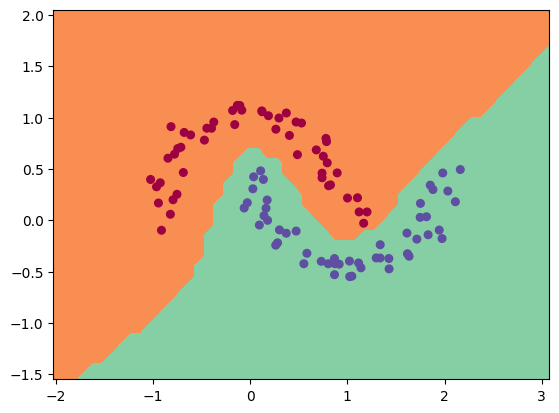

In [39]:
#visualize decision boundary
h=0.1
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx,yy = np.meshgrid(np.arange(x_min,x_max, h), np.arange(y_min,y_max, h))

Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Value, xi)) for xi in Xmesh]
scores = list(map(model, inputs))

Z = np.array([s.data>0 for s in scores])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=1)
plt.scatter(X[:,0], X[:,1], c=y, s=30, cmap=plt.cm.Spectral)

In [31]:
Xmesh

array([[-2.02219391, -1.5486393 ],
       [-1.77219391, -1.5486393 ],
       [-1.52219391, -1.5486393 ],
       [-1.27219391, -1.5486393 ],
       [-1.02219391, -1.5486393 ],
       [-0.77219391, -1.5486393 ],
       [-0.52219391, -1.5486393 ],
       [-0.27219391, -1.5486393 ],
       [-0.02219391, -1.5486393 ],
       [ 0.22780609, -1.5486393 ],
       [ 0.47780609, -1.5486393 ],
       [ 0.72780609, -1.5486393 ],
       [ 0.97780609, -1.5486393 ],
       [ 1.22780609, -1.5486393 ],
       [ 1.47780609, -1.5486393 ],
       [ 1.72780609, -1.5486393 ],
       [ 1.97780609, -1.5486393 ],
       [ 2.22780609, -1.5486393 ],
       [ 2.47780609, -1.5486393 ],
       [ 2.72780609, -1.5486393 ],
       [ 2.97780609, -1.5486393 ],
       [-2.02219391, -1.2986393 ],
       [-1.77219391, -1.2986393 ],
       [-1.52219391, -1.2986393 ],
       [-1.27219391, -1.2986393 ],
       [-1.02219391, -1.2986393 ],
       [-0.77219391, -1.2986393 ],
       [-0.52219391, -1.2986393 ],
       [-0.27219391,